## 1. Google Play Store apps and reviews
<p>Las aplicaciones móviles están en todas partes. Son fáciles de crear y pueden resultar muy lucrativas. Debido a estos dos factores, se están desarrollando cada vez más aplicaciones. En este ejercicio, haremos un análisis completo del mercado de aplicaciones de Android comparando más de diez mil aplicaciones en Google Play en diferentes categorías. Buscaremos información valiosa en los datos para diseñar estrategias que impulsen el crecimiento y la retención.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Tenemos dos fuentes de datos:</p>
<ul>
<li><code>apps.csv</code>: contiene todos los detalles de las aplicaciones en Google Play. Hay 13 características que describen una aplicación determinada.</li>
<li><code>user_reviews.csv</code>: contiene 100 reseñas para cada aplicación, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">reviews</a>. El texto de cada reseña se ha procesado previamente y se le atribuyen tres características nuevas: Sentimiento (positivo, negativo o neutral), Polaridad del sentimiento y Subjetividad del sentimiento..</li>
</ul>

In [2]:
# Importa las librerías de pandas y matplotlin
import pandas as pd
import matplotlib.pyplot as plt


# Importa el datase apps.csv
apps = pd.read_csv('apps.csv')

# Borra todos los duplicados del dataset
apps= apps.drop_duplicates()
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
# Imprime el total de apps que se van a analizar que quedan (dimensión)
print('Total number of apps in the dataset = ', len(apps))

Total number of apps in the dataset =  9659


In [4]:
# Imprime la estádistica descriptiva de resumen
print(apps.describe())

            Rating       Reviews         Size
count  8196.000000  9.659000e+03  8432.000000
mean      4.173243  2.165926e+05    20.395327
std       0.536625  1.831320e+06    21.827509
min       1.000000  0.000000e+00     0.000000
25%       4.000000  2.500000e+01     4.600000
50%       4.300000  9.670000e+02    12.000000
75%       4.500000  2.940100e+04    28.000000
max       5.000000  7.815831e+07   100.000000


In [5]:
# Vamos a echar un vistazo al DataFrame final
print(apps)

                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9654                                   Sya9a Maroc - FR               FAMILY   
9655                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9656                             Parkinson Exercices FR              MEDICAL   
9657                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9658      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating  Reviews  Size     Install

In [6]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB


## 2. Data cleaning
<p>Las cuatro variables con las que trabajaremos con más frecuencia de ahora en adelante son <i>Installs</i>, <i>Size</i>, <i>Rating</i> y <i>Price</i>. La función <code>info()</code> nos dice que las columnas <i>Installs</i> y <i>Price</i> son de tipo <code>object</code>, no son de tipo <code>int</code> o <code>float</code> como esperaríamos. Esto se debe a que la columna contiene algunos caracteres más que solo [0,9] dígitos. Idealmente, queremos que estas columnas fueran puramente numéricas<br>
<br>
Por lo tanto, ahora necesitamos limpiar nuestros datos. Específicamente, los caracteres especiales <code>,</code> y <code>+</code> que se encuentran en la columna <i>Installs</i> y <code>$</code> que esta en la columna <i>Price</i>.</p>

<p>Aquí un link donde podrás ver un poco más a detalle que es una <a href="https://www.freecodecamp.org/espanol/news/expresiones-lambda-en-python/">función lambda</a>

In [7]:
# Lista de caracteres a eliminar
chars_to_remove = [',','+','$']
# Lista de las columnas a limpiar
cols_to_clean = ['Installs','Price']

# Loop para cada columna
for col in cols_to_clean:
    # Loop para cada caracter especial
    for char in chars_to_remove:
        # Reemplaza con una función lambda el caracter especial por un texto vacío ('')
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
    # Convierte la columna a tipo flotante (float)
    apps[col] = apps[col].astype(float)

## 3. Exploring App's categories
<p>Con más de mil millones de usuarios activos en 190 países de todo el mundo, Google Play sigue siendo una importante plataforma de distribución para crear una audiencia global. Para que las empresas muestren sus aplicaciones a los usuarios, es importante hacerlas más rápida y fácilmente visibles en Google Play. Para mejorar la experiencia de búsqueda general, Google ha introducido el concepto de agrupar aplicaciones en categorías.</p>
<p>Esto nos lleva a las siguientes preguntas:</p>
<ul>
<li>¿Qué categoría tiene la mayor participación de aplicaciones (activas) en el mercado?</li>
<li>¿Alguna categoría específica domina el mercado?</li>
<li>¿Qué categorías tienen la menor cantidad de aplicaciones?</li>
</ul>
<p>Vamos a responder estas preguntas aquí <code>33</code> categorías unicas estan presentas en nuestro dataset. Las apps de <em>Family</em> y <em>Game</em> tienen la mayor prevalencia del mercado. Curiosamente, <em>Tools</em>, <em>Business</em> y <em>Medical</em> también están en el top.</p>

In [8]:
# Imprime el total de categorías únicas
num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

Number of categories =  33


In [9]:
# Cuenta el número de aplicaciones en cada Categoría y ordena de manera descendente 
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)
print(num_apps_in_category)

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64


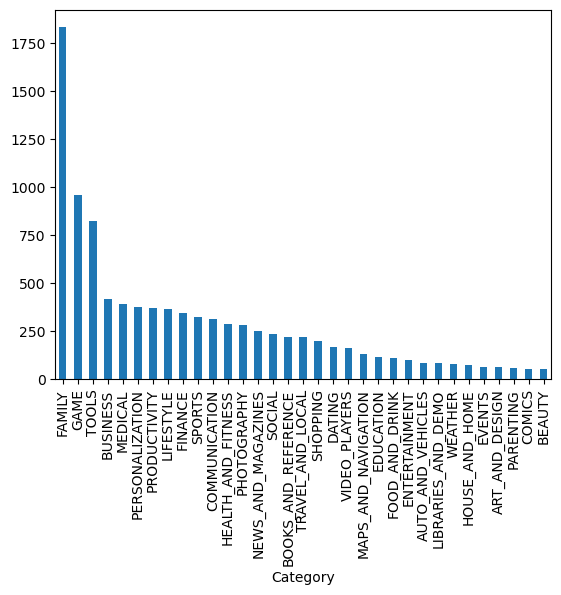

In [10]:
# Muestra el resultado en una gráfica de barras
num_apps_in_category.plot(kind='bar')
plt.show()

## 4. Ratings Distribution
<p>Después de analizar la participación de mercado para cada categoría de las aplicaciones, veamos cómo se posicionan de acuerdo a las calificaciones (en una escala del 1 al 5) las cuales afectan la imagen de la marca general de la empresa. Las calificaciones son un indicador clave de rendimiento de una aplicación.</p>

In [11]:
# Calcular el promedio de calificación de las apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

Average app rating =  4.173243045387994


In [12]:
# Calcula el promedio de calificación por categoría
avg_rating_by_category = apps.groupby('Category')['Rating'].mean()
print(avg_rating_by_category)

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.179664
FINANCE                4.115563
FOOD_AND_DRINK         4.172340
GAME                   4.247368
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230000
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  4.039554
TRAVEL_AND_LOCAL       4.069519

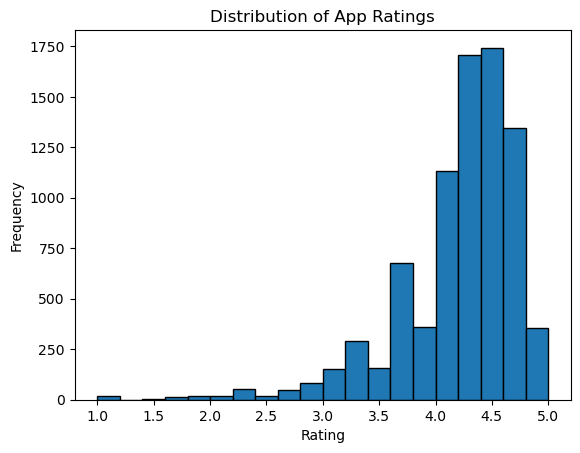

In [13]:
# Visualiza en un histograma el comportamiento del Rating
apps['Rating'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 5. Size and Price
<p>Examinemos ahora el tamaño y el precio de la aplicación. En cuanto al tamaño, si la aplicación móvil es demasiado grande, puede ser difícil y/o costoso para los usuarios descargarla. Los tiempos de descarga prolongados pueden desanimar a los usuarios incluso antes de que experimenten su aplicación móvil. Además, el dispositivo de cada usuario tiene una cantidad limitada de espacio en disco. Por el precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o económicas. Estos problemas se agravan si el mercado objetivo es en países en vías de desarrollo; especialmente debido a las velocidades de Internet, el poder adquisitivo, los tipos de cambio, etc.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>¿El tamaño de una aplicación afecta su calificación?</li>
<li>¿Los usuarios realmente se preocupan por las aplicaciones pesadas del sistema o prefieren las aplicaciones ligeras? </li>
<li>¿El precio de una aplicación afecta su calificación? </li>
<li>¿Los usuarios siempre prefieren las aplicaciones gratuitas a las de paga?</li>
</ul>

In [14]:
# Filtra filas donde los valores de 'Rating' y 'Size' no sean nulos
apps_with_size_and_rating_present = apps.dropna(subset=['Rating', 'Size'])
apps_with_size_and_rating_present

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.6,1000.0,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
9652,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up


In [15]:
# Filtra las categorías con al menos 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)
large_categories

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
839,Citibanamex Movil,FINANCE,3.6,52306,42.0,5000000.0,Free,0.0,Everyone,Finance,"July 27, 2018",20.1.0,5.0 and up
841,KTB Netbank,FINANCE,3.8,42644,19.0,5000000.0,Free,0.0,Everyone,Finance,"June 28, 2018",8.18,4.2 and up
842,Mobile Bancomer,FINANCE,4.2,278082,70.0,10000000.0,Free,0.0,Everyone,Finance,"July 30, 2018",10.78,4.0.3 and up
843,Nedbank Money,FINANCE,4.2,6076,32.0,500000.0,Free,0.0,Everyone,Finance,"July 28, 2018",4.1.1-0-prod,4.2 and up
844,SCB EASY,FINANCE,4.2,112656,93.0,5000000.0,Free,0.0,Everyone,Finance,"July 19, 2018",3.9.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,Fr Agnel Ambarnath,FAMILY,4.2,117,13.0,5000.0,Free,0.0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
9652,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up


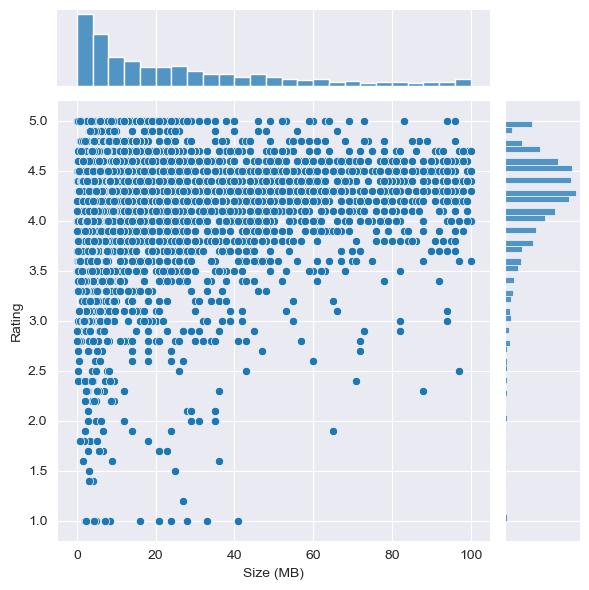

In [16]:
# Gráfica size vs. rating
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])
plt1.set_axis_labels('Size (MB)', 'Rating')
plt.show()

In [17]:
# Selecciona las apps de paga 'Type' = 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
372,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000.0,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
406,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000.0,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
407,Calculator,DATING,2.6,57,6.2,1000.0,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9555,FP VoiceBot,FAMILY,NaN,17,0.2,100.0,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
9579,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,1000.0,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
9600,Trine 2: Complete Story,GAME,3.8,252,11.0,10000.0,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
9603,"sugar, sugar",FAMILY,4.2,1405,9.5,10000.0,Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


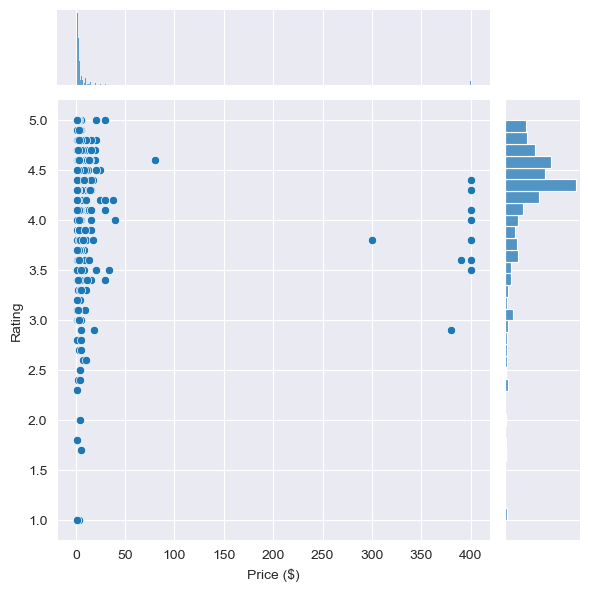

In [18]:
# Grafica price vs. rating de las aplicaciones de paga
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])
plt2.set_axis_labels('Price ($)', 'Rating')
plt.show()

## 6. Relation between Category & Price
<p>Así que ahora viene la parte difícil. ¿Cómo se supone que las empresas y los desarrolladores cubran sus cuotas de fin de mes? ¿Qué estrategias de monetización pueden utilizar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan en gran medida en las características, la complejidad y la plataforma. Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para las aplicaciones moviles. Es importante considerar la disposición de su cliente a pagar por la aplicación. Un precio elevado puede hacer que los clientes no se vean atraídos por descargarlaque ocurra la descarga o pueden eliminar una aplicación que han descargado después de recibir demasiados anuncios o simplemente no obtener el valor que esperaban de su dinero.</p>

<p>Las diferentes categorías exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la aplicación de calculadora, probablemente deberían mantenerse gratuitas. Sin embargo, tendría sentido cobrar por una aplicación médica altamente especializada que diagnostica a pacientes diabéticos, así que vamos a descubrir y encontrar la respuesta</p>

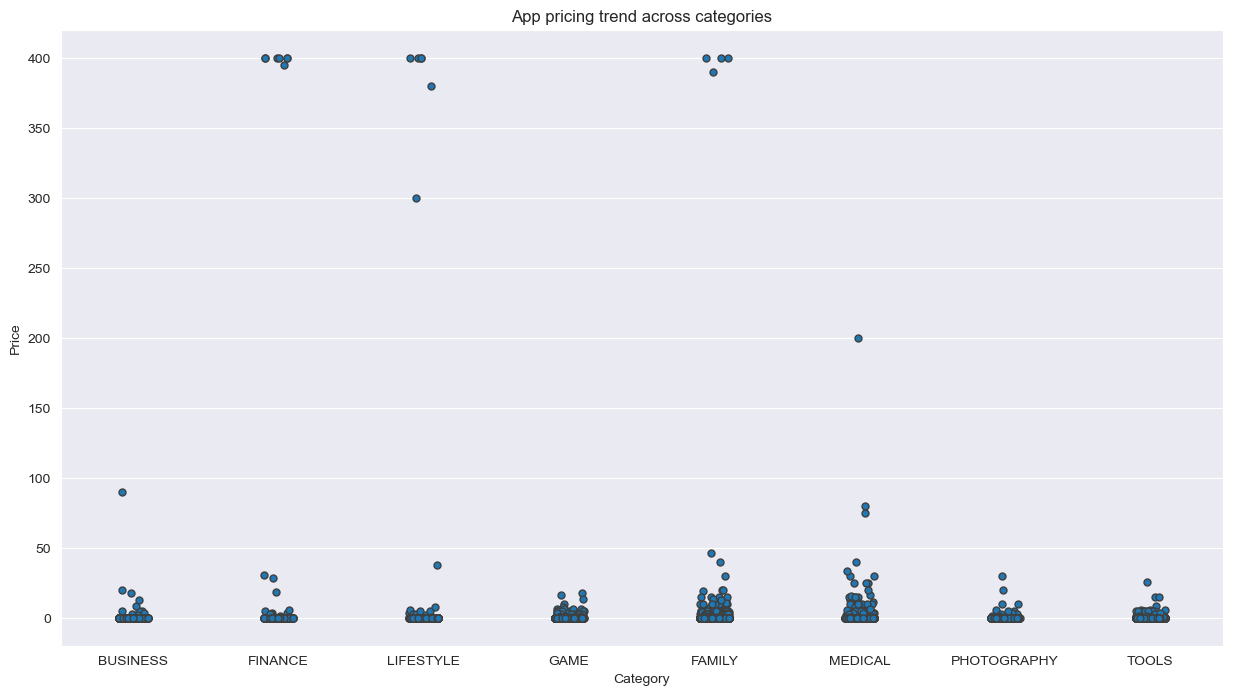

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Lista de categorías populares
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examina la tendencia de precio graficando el Precio por Categoría
ax = sns.stripplot(x = popular_app_cats['Category'], y = popular_app_cats['Price'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
plt.show()

In [20]:
# Selecciona las apps con un precio mayor a 200
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


## 7. Paid apps vs Free apps
<p>Para las aplicaciones de Play Store en la actualidad, existen cinco tipos de estrategias de precios: gratis, "freemium", de pago, "paymium" y de suscripción. Centrémonos solo en aplicaciones gratuitas y de pago. 

Algunas características de las aplicaciones gratuitas son:</p>
<ul>
<li>Libres de descarga.</li>
<li>La principal fuente de ingresos a menudo proviene de la publicidad.</li>
<li>Por lo general son creadaa por empresas que tienen otros productos y la aplicación sirve como una extensión de esos productos.</li>
<li>Puede servir como una herramienta para la retención de clientes, la comunicación y el servicio al cliente.</li>
</ul>
<p>Algunas características de las aplicaciones de paga son:</p>
<ul>
<li>Tienen un tiempo de servicio de prueba gratuito, esto para que el usuario pueda conocerla.</li>
<li>Ofrecen un servicio de mayor especialidad.</li>
</ul>
<p>¿Además de esto que otras características diferencías a las aplicaciones de pago las aplicaciones gratuitas?</p>

# Las aplicaciones de paga ofrecen mas o mejores servicios que las apps gratuitas

# Las apps de paga se descargan menos que las gratuitas

# Las apps de paga son para un publico mas adulto por lo general

## 8. Sentiment analysis
<p>La minería de datos de reseñas de usuarios para determinar cómo se sienten las personas acerca de su producto, marca o servicio se puede realizar mediante una técnica llamada análisis de sentimientos. Las reseñas de los usuarios de las aplicaciones se pueden analizar para identificar si el estado de ánimo es positivo, negativo o neutral con respecto a esa aplicación. Por ejemplo, las palabras positivas en la revisión de una aplicación pueden incluir palabras como "asombroso", "amigable", "bueno", "excelente" y "amor". Las palabras negativas pueden ser palabras como 'malware', 'odio', 'problema', 'reembolso' e 'incompetente'.</p>

<p>¿Qué podemos decir acerca del analisis de sentimiento de las aplicaciones?</p>

In [22]:
# Carga el archivo user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Une los dos DataFrames (join)
merged_df = pd.concat([apps, reviews_df], axis =1, join = 'inner')
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,10 Best Foods for You,NaN,NaN,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Avakin Life - 3D virtual world,NaN,NaN,NaN,NaN
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up,Avakin Life - 3D virtual world,NaN,NaN,NaN,NaN
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up,Avakin Life - 3D virtual world,It's really good ppl block u reason u gift acc...,Positive,0.183988,0.485640
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Avakin Life - 3D virtual world,NaN,NaN,NaN,NaN


In [23]:
# Elimina los valores nulos (NA) de las columnas Sentiment y Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4,10000.0,Free,0.0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up,Avakin Life - 3D virtual world,You're given decent amount game money begin se...,Negative,-0.103205,0.574359
9648,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3,100000.0,Free,0.0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up,Avakin Life - 3D virtual world,This good game. Love dress buuuut I little com...,Positive,0.139063,0.403125
9651,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.6,1000.0,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,Avakin Life - 3D virtual world,Loooooove game! I play time met many nice peoo...,Positive,0.086237,0.605051
9652,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,Avakin Life - 3D virtual world,"This much, game makes much cache end I get gli...",Positive,0.241667,0.308333


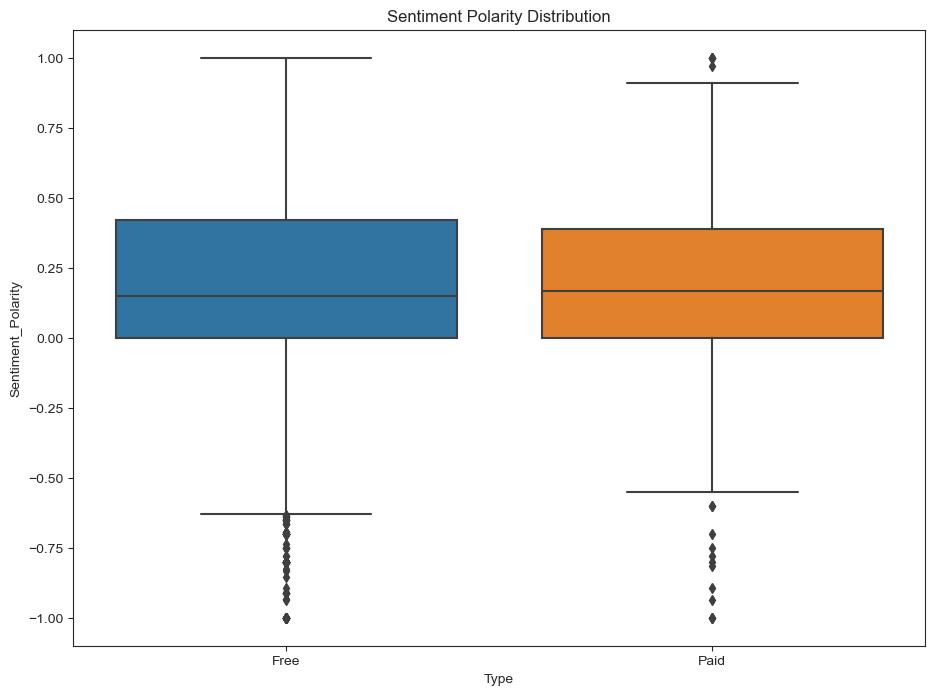

In [24]:
# Grafica la polaridad de sentimientos para apps gratuitas y de paga
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'] , data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
plt.show()

## 9. Conclusion
<p>En este cuaderno, analizamos más de diez mil aplicaciones de Google Play Store. Podemos usar nuestros hallazgos para poder encontrar información valiosa por si alguna vez deseamos crear una aplicación nosotros mismos.
    